In [15]:
import sys
sys.path.append('../')
from Trajectory import Point_Lander
from Optimisation import Hermite_Simpson
from PyGMO import *
from numpy import *
from ipyparallel import Client
import matplotlib.pyplot as plt

In [2]:
# Instantiate the algorithm and model
alg1 = algorithm.scipy_slsqp(max_iter=3000, screen_output=True)
model = Point_Lander()

In [3]:
# Defining the starting area
silb  = array([-100, 500, -100, -30, 8000], float)
siub  = array([100, 1000, 100, 10, 9000], float)
ntraj = 200 # Number of trajectories to generate
# We load the first trajectory we started with
z = load('HSD2.npy')

In [4]:
# We generate random data points
points = [random.random()*(siub - silb) + silb for i in range(ntraj)]
# We then sort them
points = sort(array(points), axis=0)

In [7]:
# Then we iteratively optimise various trajectories
for i in range(len(points)):
    # Instantiate the problem
    prob = Hermite_Simpson(Point_Lander(points[i]), nsegs=20)
    # create a population for the new problem
    pop  = population(prob)
    # and add the previous population decision vector
    pop.push_back(z)
    # then evolve the trajectory
    pop  = alg1.evolve(pop)
    # name the file to save to
    filename = 'HS_20_' + str(i)
    # extract the decision vector
    z = pop.champion.x
    # save it!
    save(filename, z)

  NIT    FC           OBJFUN            GNORM
    1   231    -9.661133E+03     1.000000E+00
    2   462    -9.660959E+03     1.000000E+00
    3   693    -9.660091E+03     1.000000E+00
    4   924    -9.655767E+03     1.000000E+00
    5  1155    -9.636469E+03     1.000000E+00
    6  1386    -9.593369E+03     1.000000E+00
    7  1617    -9.452011E+03     1.000000E+00
    8  1848    -9.394973E+03     1.000000E+00
    9  2079    -9.339932E+03     1.000000E+00
   10  2310    -9.258971E+03     1.000000E+00
   11  2541    -9.054386E+03     1.000000E+00
   12  2772    -8.938716E+03     1.000000E+00
   13  3003    -8.868853E+03     1.000000E+00
   14  3234    -8.829716E+03     1.000000E+00
   15  3465    -8.741044E+03     1.000000E+00
   16  3696    -8.640285E+03     1.000000E+00
   17  3928    -8.014973E+03     1.000000E+00
   18  4159    -7.130943E+03     1.000000E+00
   19  4390    -7.127286E+03     1.000000E+00
   20  4621    -7.140122E+03     1.000000E+00
   21  4852    -7.156873E+03     1

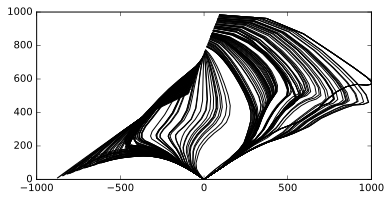

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.close('all')
plt.axes().set_aspect('equal')
prob = Hermite_Simpson(Point_Lander(), nsegs=20)
for i in range(len(points)):
    fname = 'HS_20_' + str(i) + '.npy'
    z = load(fname)
    tf, cb, s, c = prob.Decode(z)
    plt.plot(s[:,0], s[:,1], 'k-')
plt.show()


# Using Trapezoidal Transcription